In [2]:
# --- Passagem 1: Importações ---
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

# --- Passagem 2: Definindo Nossos Ativos e Período ---
assets = ['NVDA', 'UUUU', 'BTC-USD', 'SPY']
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=5*365)

# --- Passagem 3: Baixando os Dados ---
print(f"Baixando dados para: {assets}")
data = yf.download(assets, start=start_date, end=end_date)['Close']

# --- Passagem 4: Salvando e Carregando os Dados ---
data.to_csv('../data/raw/asset_prices.csv')

# Usamos index_col=0 e parse_dates=True
df = pd.read_csv('../data/raw/asset_prices.csv', index_col=0, parse_dates=True)

print("\nDados carregados com sucesso!")
display(df.head())
display(df.tail())

Baixando dados para: ['NVDA', 'UUUU', 'BTC-USD', 'SPY']


/var/folders/bc/3fck38_57j918mwlyxrxlxnh0000gn/T/ipykernel_4965/1039725907.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start=start_date, end=end_date)['Close'] # <-- MUDANÇA AQUI
[*********************100%***********************]  4 of 4 completed


Dados carregados com sucesso!


,BTC-USD,NVDA,SPY,UUUU
Date,,,,
2020-11-04,14133.707031,13.752270,320.268921,1.49
2020-11-05,15579.848633,14.116908,326.514984,1.62
2020-11-06,15565.880859,14.517684,326.440460,1.62
2020-11-07,14833.753906,NaN,NaN,NaN
2020-11-08,15479.567383,NaN,NaN,NaN


,BTC-USD,NVDA,SPY,UUUU
Date,,,,
2025-10-29,110055.304688,207.039993,687.390015,20.40
2025-10-30,108305.546875,202.889999,679.830017,21.82
2025-10-31,109556.164062,202.490005,682.059998,20.51
2025-11-01,110064.015625,NaN,NaN,NaN
2025-11-02,110639.625000,NaN,NaN,NaN


In [3]:
# --- Passagem 1: Calculando os Retornos Diários ---
# O método .pct_change() calcula a variação percentual de um dia para o outro
# Ele faz isso para todas as colunas de uma vez
returns = df.pct_change()

# --- Passagem 2: Limpando os dados ---
# O primeiro dia não tem retorno (pois não há dia anterior para comparar)
# Isso resulta em uma linha de NaN (Not a Number), que precisamos remover
returns = returns.dropna()

# --- Passagem 3: Inspecionando os retornos ---
print("Retornos diários calculados:")
display(returns.head())

Retornos diários calculados:


/var/folders/bc/3fck38_57j918mwlyxrxlxnh0000gn/T/ipykernel_4965/1603196189.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change()


,BTC-USD,NVDA,SPY,UUUU
Date,,,,
2020-11-05,0.102319,0.026515,0.019503,0.087248
2020-11-06,-0.000897,0.028390,-0.000228,0.000000
2020-11-07,-0.047034,0.000000,0.000000,0.000000
2020-11-08,0.043537,0.000000,0.000000,0.000000
2020-11-09,-0.009513,-0.063951,0.012566,0.000000


Matriz de Correlação:


,BTC-USD,NVDA,SPY,UUUU
BTC-USD,1.000000,0.274296,0.341755,0.203871
NVDA,0.274296,1.000000,0.690245,0.313411
SPY,0.341755,0.690245,1.000000,0.390054
UUUU,0.203871,0.313411,0.390054,1.000000


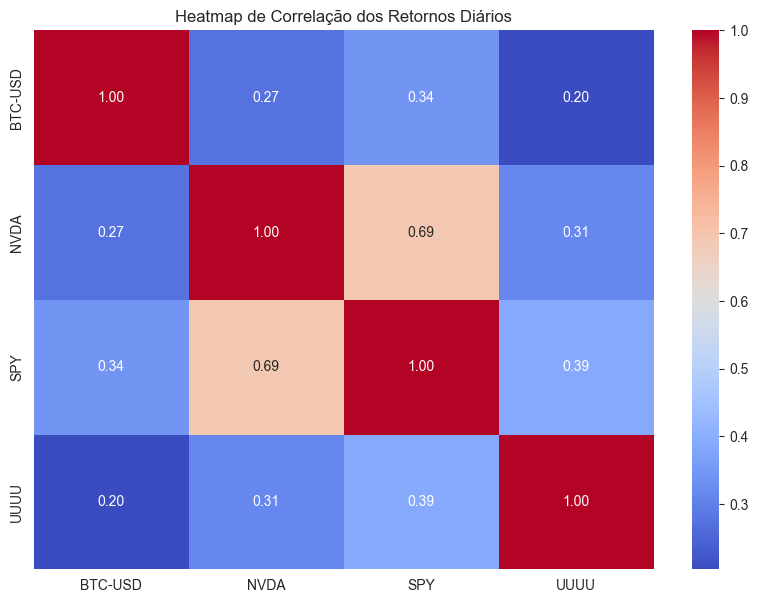

In [4]:
# --- Passagem 1: Calculando a Matriz de Correlação ---
# O método .corr() calcula a correlação entre todas as colunas
corr_matrix = returns.corr()

print("Matriz de Correlação:")
display(corr_matrix)

# --- Passagem 2: Plotando o Mapa de Calor (Heatmap) ---
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, 
            annot=True,     # Mostra os números (anotações) dentro de cada quadrado
            cmap='coolwarm',# O esquema de cores (frio=azul, quente=vermelho)
            fmt='.2f')      # Formata os números para 2 casas decimais

plt.title('Heatmap de Correlação dos Retornos Diários')
plt.show()


In [5]:
# --- Passagem 1: Calculando o Retorno Médio Anualizado ---
# .mean() calcula o retorno médio diário
# Multiplicamos por 252 (número aproximado de dias de negociação em um ano)
mean_returns = returns.mean() * 252

# --- Passagem 2: Calculando a Volatilidade Anualizada (Risco) ---
# .std() calcula o desvio padrão dos retornos diários (nossa medida de risco)
# Multiplicamos pela raiz quadrada de 252 para anualizar o risco
volatility = returns.std() * np.sqrt(252)

# --- Passagem 3: Criando um DataFrame de Risco/Retorno ---
risk_return_df = pd.DataFrame({'Retorno Anualizado': mean_returns, 'Volatilidade Anual (Risco)': volatility})

print("Risco e Retorno Anualizado de cada Ativo:")
display(risk_return_df)


Risco e Retorno Anualizado de cada Ativo:


,Retorno Anualizado,Volatilidade Anual (Risco)
BTC-USD,0.405677,0.492952
NVDA,0.464407,0.432713
SPY,0.114513,0.141976
UUUU,0.550074,0.618409


In [6]:
# --- Passagem 1: Definindo a Taxa Livre de Risco ---
# Vamos assumir uma taxa livre de risco de 2% ao ano
risk_free_rate = 0.02

# --- Passagem 2: Calculando o Índice de Sharpe ---
# A fórmula é (Retorno Anualizado - Taxa Livre de Risco) / Volatilidade Anual
risk_return_df['Sharpe Ratio'] = (risk_return_df['Retorno Anualizado'] - risk_free_rate) / risk_return_df['Volatilidade Anual (Risco)']

# --- Passagem 3: Exibindo os resultados ---
print("Risco, Retorno e Índice de Sharpe dos Ativos:")
# Ordenamos do maior Sharpe Ratio para o menor
display(risk_return_df.sort_values(by='Sharpe Ratio', ascending=False))

Risco, Retorno e Índice de Sharpe dos Ativos:


,Retorno Anualizado,Volatilidade Anual (Risco),Sharpe Ratio
NVDA,0.464407,0.432713,1.027024
UUUU,0.550074,0.618409,0.857157
BTC-USD,0.405677,0.492952,0.782384
SPY,0.114513,0.141976,0.665697


In [7]:
# --- Passagem 1: Configurando a Simulação ---
num_portfolios = 20000  # Vamos simular 20.000 carteiras diferentes
risk_free_rate = 0.02   # Nossa taxa livre de risco

# Preparando a Matriz de Covariância (como os ativos se movem juntos)
cov_matrix = returns.cov() * 252

# --- Passagem 2: Preparando as listas para guardar os resultados ---
portfolio_returns = []
portfolio_volatility = []
portfolio_sharpe = []
portfolio_weights = []

# --- Passagem 3: O Loop da Simulação de Monte Carlo ---
print(f"Rodando a Simulação de Monte Carlo para {num_portfolios} carteiras...")

num_assets = len(assets) # Nossos 4 ativos

for _ in range(num_portfolios):
    # 1. Gerar Pesos Aleatórios
    weights = np.random.random(num_assets)
    # 2. Normalizar os pesos para que a soma seja 1 (100%)
    weights /= np.sum(weights)

    # 3. Calcular o Retorno da Carteira
    port_return = np.dot(weights, mean_returns)

    # 4. Calcular o Risco (Volatilidade) da Carteira
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # 5. Calcular o Índice de Sharpe da Carteira
    sharpe = (port_return - risk_free_rate) / port_vol

    # 6. Guardar os resultados
    portfolio_returns.append(port_return)
    portfolio_volatility.append(port_vol)
    portfolio_sharpe.append(sharpe)
    portfolio_weights.append(weights)

print("Simulação concluída!")

Rodando a Simulação de Monte Carlo para 20000 carteiras...
Simulação concluída!


In [9]:
# --- Passagem 1: Criando um DataFrame com os resultados da simulação ---
# Juntamos os resultados da simulação em um único DataFrame para facilitar a análise
simulation_results = pd.DataFrame({
    'Retorno': portfolio_returns,
    'Volatilidade': portfolio_volatility,
    'Sharpe Ratio': portfolio_sharpe
})

# Adicionamos os pesos de cada ativo a este DataFrame
weights_df = pd.DataFrame(portfolio_weights, columns=assets)
simulation_results = pd.concat([simulation_results, weights_df], axis=1)

print("DataFrame com os resultados da simulação:")
display(simulation_results.head())


# --- Passagem 2: Encontrando a Carteira de Sharpe Máximo (Ótima) ---
max_sharpe_idx = simulation_results['Sharpe Ratio'].idxmax()
optimal_portfolio = simulation_results.loc[max_sharpe_idx]

print("\n--- CARTEIRA ÓTIMA (Sharpe Ratio Máximo) ---")
print("Retorno Anualizado:", f"{optimal_portfolio['Retorno']*100:.2f}%")
print("Risco (Volatilidade) Anual:", f"{optimal_portfolio['Volatilidade']*100:.2f}%")
print("Índice de Sharpe:", f"{optimal_portfolio['Sharpe Ratio']:.2f}")
print("\nPesos da Carteira:")
# --- CORREÇÃO AQUI ---
# Usamos uma função lambda para aplicar a formatação f-string
print(optimal_portfolio[assets].to_string(float_format=lambda x: f"{x:.2%}"))


# --- Passagem 3: Encontrando a Carteira de Volatilidade Mínima (Segura) ---
min_vol_idx = simulation_results['Volatilidade'].idxmin()
min_risk_portfolio = simulation_results.loc[min_vol_idx]

print("\n--- CARTEIRA DE RISCO MÍNIMO (Volatilidade Mínima) ---")
print("Retorno Anualizado:", f"{min_risk_portfolio['Retorno']*100:.2f}%")
print("Risco (Volatilidade) Anual:", f"{min_risk_portfolio['Volatilidade']*100:.2f}%")
print("Índice de Sharpe:", f"{min_risk_portfolio['Sharpe Ratio']:.2f}")
print("\nPesos da Carteira:")
# --- CORREÇÃO AQUI ---
# Usamos a mesma função lambda
print(min_risk_portfolio[assets].to_string(float_format=lambda x: f"{x:.2%}"))

DataFrame com os resultados da simulação:


,Retorno,Volatilidade,Sharpe Ratio,NVDA,UUUU,BTC-USD,SPY
0,0.357750,0.280768,1.202953,0.183378,0.255717,0.330465,0.230440
1,0.426477,0.344521,1.179831,0.343801,0.186537,0.133100,0.336562
2,0.413343,0.318296,1.235780,0.293849,0.368063,0.144110,0.193978
3,0.409871,0.330600,1.179282,0.192025,0.597987,0.140617,0.069372
4,0.397747,0.337497,1.119259,0.316107,0.079588,0.229277,0.375027



--- CARTEIRA ÓTIMA (Sharpe Ratio Máximo) ---
Retorno Anualizado: 46.46%
Risco (Volatilidade) Anual: 35.46%
Índice de Sharpe: 1.25

Pesos da Carteira:
NVDA      29.14%
UUUU      45.30%
BTC-USD    1.05%
SPY       24.52%

--- CARTEIRA DE RISCO MÍNIMO (Volatilidade Mínima) ---
Retorno Anualizado: 16.46%
Risco (Volatilidade) Anual: 16.05%
Índice de Sharpe: 0.90

Pesos da Carteira:
NVDA       3.88%
UUUU       5.04%
BTC-USD   86.23%
SPY        4.85%


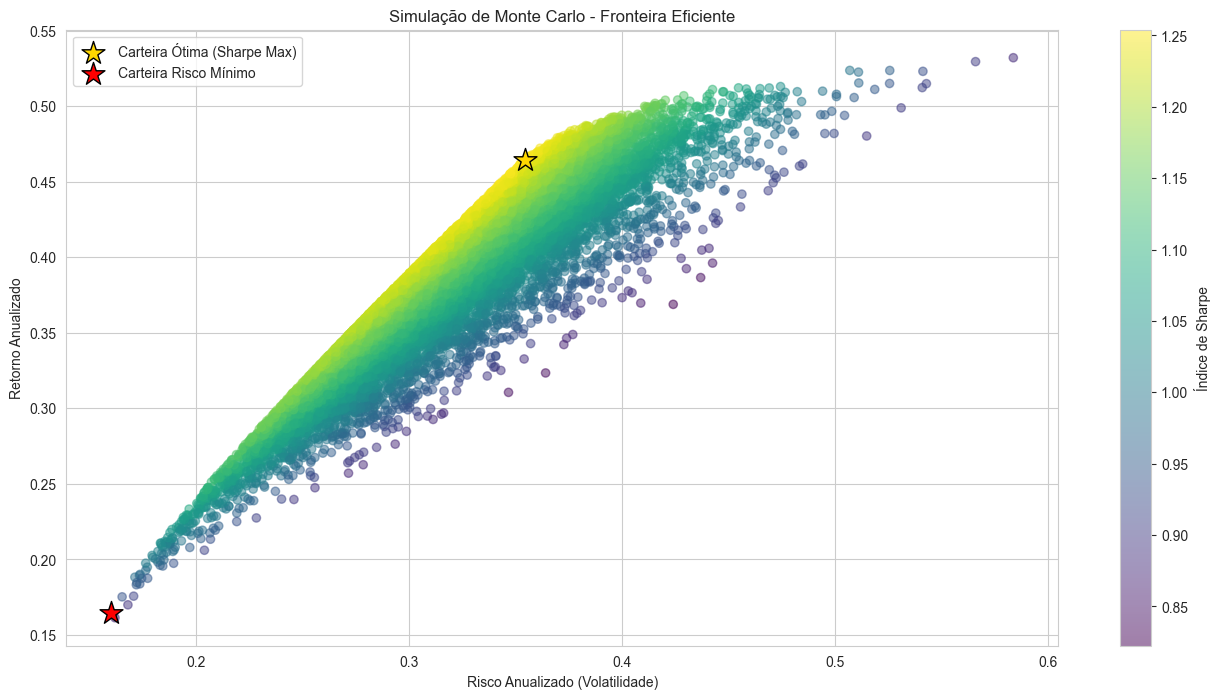

In [10]:
# --- Passagem 1: Plotando todas as 20.000 carteiras simuladas ---
plt.figure(figsize=(16, 8))

# Criamos um gráfico de dispersão (scatter plot)
# Eixo X: Volatilidade (Risco)
# Eixo Y: Retorno
# Cor (c): Índice de Sharpe (mais escuro = melhor)
# cmap='viridis': Um bom mapa de cores
# alpha=0.5: Deixa os pontos semi-transparentes
plt.scatter(simulation_results['Volatilidade'], 
            simulation_results['Retorno'], 
            c=simulation_results['Sharpe Ratio'], 
            cmap='viridis', 
            alpha=0.5)

# Adicionamos a barra de cores para referência
plt.colorbar(label='Índice de Sharpe')

# --- Passagem 2: Destacando nossas duas carteiras campeãs ---
# Adicionamos a Carteira Ótima (Sharpe Máximo) como uma estrela dourada
plt.scatter(optimal_portfolio['Volatilidade'], 
            optimal_portfolio['Retorno'], 
            marker='*',                # Define o marcador como uma estrela
            color='gold',              # Define a cor
            s=300,                     # Define o tamanho
            edgecolors='black',        # Adiciona uma borda preta
            label='Carteira Ótima (Sharpe Max)')

# Adicionamos a Carteira de Risco Mínimo como uma estrela vermelha
plt.scatter(min_risk_portfolio['Volatilidade'], 
            min_risk_portfolio['Retorno'], 
            marker='*',
            color='red',
            s=300,
            edgecolors='black',
            label='Carteira Risco Mínimo')

# --- Passagem 3: Customizando o Gráfico ---
plt.title('Simulação de Monte Carlo - Fronteira Eficiente')
plt.xlabel('Risco Anualizado (Volatilidade)')
plt.ylabel('Retorno Anualizado')
plt.legend()
plt.grid(True)
plt.show()